# DATA EXPLORATION 
---
## Leeeet's Goooooo


In [3]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
print("Setup complete")


Setup complete


In [5]:
df_answers = pd.read_csv('../data/Answers.csv', encoding='latin-1')
df_questions = pd.read_csv('../data/Questions.csv', encoding='latin-1')
df_tags = pd.read_csv('../data/Tags.csv', encoding='latin-1')

In [6]:
df_questions.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...


In [7]:
new_data = df_answers.merge(df_questions, how='inner', left_on='ParentId', right_on='Id')

In [8]:
new_data

,Id_x,OwnerUserId_x,CreationDate_x,ParentId,Score_x,Body_x,Id_y,OwnerUserId_y,CreationDate_y,Score_y,Title,Body_y
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilit...,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,518,153.0,2008-08-02T17:42:28Z,469,2,<p>I haven't been able to find anything that d...,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
2,3040,457.0,2008-08-06T03:01:23Z,469,12,<p>Unfortunately the only API that isn't depre...,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
3,195170,745.0,2008-10-12T07:02:40Z,469,1,<p>There must be a method in Cocoa to get a li...,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
4,536,161.0,2008-08-02T18:49:07Z,502,9,<p>You can use ImageMagick's convert utility f...,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...
...,...,...,...,...,...,...,...,...,...,...,...,...
987117,40143239,6640099.0,2016-10-19T23:41:38Z,40142731,2,<p>Well there are many different ways to detec...,40142731,6875348.0,2016-10-19T22:46:59Z,0,Collision Between two sprites - Python 3.5.2,<p>I have an image of a ufo and a missile. I'm...
987118,40143315,3125566.0,2016-10-19T23:49:43Z,40143166,2,"<p>First thing, you should use <code>if/elif</...",40143166,7044992.0,2016-10-19T23:33:31Z,1,finding cubed root using delta and epsilon in ...,<p>I am trying to write a program that finds c...
987119,40143317,2350575.0,2016-10-19T23:50:04Z,40142194,0,<p>If you are using firefox ver >47.0.1 you ne...,40142194,7044759.0,2016-10-19T21:58:32Z,1,errors with webdriver.Firefox() with selenium,"<p>I am using python 3.5, firefox 45 (also tri..."
987120,40143349,6934347.0,2016-10-19T23:54:02Z,40077010,0,<p>I solved my own problem defining the follow...,40077010,6934347.0,2016-10-17T00:33:51Z,2,Can't pass random variable to tf.image.central...,<p>In Tensorflow I am training from a set of P...


In [9]:
new_data = new_data.drop(['ParentId'], axis=1)

In [10]:
new_data['Body_x'][0]

'<p>open up a terminal (Applications-&gt;Utilities-&gt;Terminal) and type this in:</p>\r\n\r\n<pre><code>locate InsertFontHere<br></code></pre>\r\n\r\n<p>This will spit out every file that has the name you want.</p>\r\n\r\n<p>Warning: there may be alot to wade through.</p>'

In [11]:
df_tags.columns

Index(['Id', 'Tag'], dtype='object')

In [12]:
for col_name in df_questions.columns:
    print(df_questions.isna()[col_name].value_counts())
    print ('--- --- --- ')

False    607282
Name: Id, dtype: int64
--- --- --- 
False    601070
True       6212
Name: OwnerUserId, dtype: int64
--- --- --- 
False    607282
Name: CreationDate, dtype: int64
--- --- --- 
False    607282
Name: Score, dtype: int64
--- --- --- 
False    607282
Name: Title, dtype: int64
--- --- --- 
False    607282
Name: Body, dtype: int64
--- --- --- 


In [13]:
for col_name in df_answers.columns:
    print(df_answers.isna()[col_name].value_counts())
    print ('--- --- --- ')

False    987122
Name: Id, dtype: int64
--- --- --- 
False    981755
True       5367
Name: OwnerUserId, dtype: int64
--- --- --- 
False    987122
Name: CreationDate, dtype: int64
--- --- --- 
False    987122
Name: ParentId, dtype: int64
--- --- --- 
False    987122
Name: Score, dtype: int64
--- --- --- 
False    987122
Name: Body, dtype: int64
--- --- --- 


In [14]:
for col_name in df_tags.columns:
    print(df_tags.isna()[col_name].value_counts())
    print ('--- --- --- ')

False    1885078
Name: Id, dtype: int64
--- --- --- 
False    1884635
True         443
Name: Tag, dtype: int64
--- --- --- 


# EXPLORATION 

c:\users\adm\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\adm\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\adm\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\adm\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

KeyboardInterrupt: 

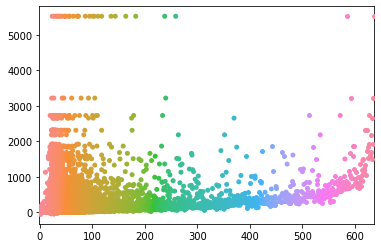

In [15]:
sns.swarmplot(x=new_data['Score_x'], y=new_data['Score_y'])

# Histogram sentences by number of words in sentences 

In [34]:
lenSentences = []
for s in new_data.head(10000).itertuples():
    res = len(s[5].split())
    lenSentences.append(res)
print(lenSentences)

[31, 38, 60, 67, 91, 68, 163, 42, 43, 145, 193, 15, 26, 105, 212, 87, 57, 179, 264, 37, 74, 57, 103, 128, 96, 75, 50, 41, 86, 39, 229, 103, 228, 17, 72, 91, 93, 62, 58, 43, 100, 323, 41, 133, 177, 106, 87, 194, 68, 74, 102, 308, 45, 63, 133, 364, 707, 20, 154, 25, 76, 44, 448, 253, 172, 30, 33, 11, 55, 374, 45, 61, 46, 59, 49, 64, 6, 95, 60, 27, 38, 24, 26, 23, 79, 6, 14, 31, 59, 69, 27, 99, 39, 37, 16, 25, 67, 138, 24, 161, 67, 49, 35, 78, 224, 28, 10, 316, 172, 20, 31, 17, 104, 44, 166, 108, 86, 38, 60, 65, 44, 62, 63, 31, 25, 38, 101, 24, 43, 90, 67, 41, 19, 88, 185, 74, 109, 143, 81, 211, 135, 58, 60, 127, 31, 25, 62, 75, 13, 67, 45, 100, 29, 63, 71, 38, 15, 38, 125, 128, 188, 42, 67, 302, 30, 120, 165, 7, 19, 28, 92, 51, 153, 14, 112, 108, 70, 103, 117, 31, 107, 84, 219, 54, 23, 27, 36, 66, 20, 30, 46, 106, 80, 40, 17, 216, 64, 37, 24, 111, 80, 89, 19, 39, 35, 66, 105, 5, 111, 27, 121, 114, 83, 258, 202, 161, 34, 31, 55, 133, 43, 86, 72, 56, 28, 205, 12, 24, 111, 13, 34, 36, 125, 

In [37]:
import itertools
[(g[0], len(list(g[1]))) for g in itertools.groupby(lenSentences)]

[(31, 1),
 (38, 1),
 (60, 1),
 (67, 1),
 (91, 1),
 (68, 1),
 (163, 1),
 (42, 1),
 (43, 1),
 (145, 1),
 (193, 1),
 (15, 1),
 (26, 1),
 (105, 1),
 (212, 1),
 (87, 1),
 (57, 1),
 (179, 1),
 (264, 1),
 (37, 1),
 (74, 1),
 (57, 1),
 (103, 1),
 (128, 1),
 (96, 1),
 (75, 1),
 (50, 1),
 (41, 1),
 (86, 1),
 (39, 1),
 (229, 1),
 (103, 1),
 (228, 1),
 (17, 1),
 (72, 1),
 (91, 1),
 (93, 1),
 (62, 1),
 (58, 1),
 (43, 1),
 (100, 1),
 (323, 1),
 (41, 1),
 (133, 1),
 (177, 1),
 (106, 1),
 (87, 1),
 (194, 1),
 (68, 1),
 (74, 1),
 (102, 1),
 (308, 1),
 (45, 1),
 (63, 1),
 (133, 1),
 (364, 1),
 (707, 1),
 (20, 1),
 (154, 1),
 (25, 1),
 (76, 1),
 (44, 1),
 (448, 1),
 (253, 1),
 (172, 1),
 (30, 1),
 (33, 1),
 (11, 1),
 (55, 1),
 (374, 1),
 (45, 1),
 (61, 1),
 (46, 1),
 (59, 1),
 (49, 1),
 (64, 1),
 (6, 1),
 (95, 1),
 (60, 1),
 (27, 1),
 (38, 1),
 (24, 1),
 (26, 1),
 (23, 1),
 (79, 1),
 (6, 1),
 (14, 1),
 (31, 1),
 (59, 1),
 (69, 1),
 (27, 1),
 (99, 1),
 (39, 1),
 (37, 1),
 (16, 1),
 (25, 1),
 (67, 1),
 (13

<AxesSubplot:ylabel='Count'>

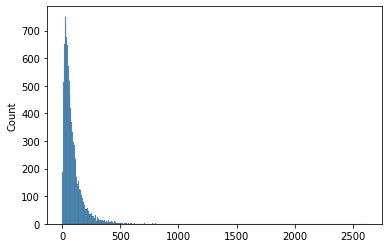

In [35]:
sns.histplot(data=new_data['Body_x'], x=lenSentences)

In [41]:
print('Minimum of length of words: '+ str(min(lenSentences)))
print('Maximum of length of words: '+ str(max(lenSentences)))

Minimum of length of words: 1
Maximum of length of words: 2619


In [74]:
from collections import Counter
dic = Counter(new_data['Score_x'])

dict_keys([4, 2, 12, 1, 9, 25, 23, 20, 14, 13, 3, 17, -2, 8, 6, 29, 0, 7, 36, 11, 5, 52, 394, 24, 15, 10, -6, 576, 66, -1, 57, 204, 341, 112, 91, 30, 35, -4, 19, 26, 189, 39, 925, 145, 266, 46, 32, 16, 74, 106, 75, 45, 37, -3, 60, 47, 28, 33, 18, 90, 374, 202, 397, 85, 27, 31, 40, 22, 103, 286, 118, 759, 224, 55, 223, 21, -18, 43, 41, 51, 169, 48, 67, 53, 188, 78, 38, 44, 49, 101, 70, 56, 270, 877, 89, 244, 610, 42, 140, 72, 1857, 142, 105, 141, 1292, 472, 209, 63, 136, 86, 1255, 111, 182, 552, 333, 198, 483, 76, 84, 71, 59, 168, 34, 96, 260, 54, 424, 58, 615, 119, 2388, 65, 565, 267, 95, 340, 220, 126, 81, 197, 616, 156, 127, 674, 102, 227, 330, 1176, 153, 575, 185, 68, 131, 88, 1030, 400, 116, 354, 100, 296, -8, -7, -14, 82, 1147, 644, 79, 87, 137, 253, 211, 964, 2356, 640, 2184, 1889, 77, 219, 460, 148, 117, 217, 1179, 4510, 281, 139, 143, 248, 50, 539, 183, 190, 255, 177, 94, 99, 251, -10, 181, 231, 73, -5, 150, 129, 325, 163, 159, 180, 315, 130, 370, 503, 240, 404, 80, 186, 64, 12

In [80]:
lessTen = dict((k, v) for k, v in dic.items() if v <= 10)
lessHundred = dict((k, v) for k, v in dic.items() if 10 < v <= 100)
lessThousand = dict((k, v) for k, v in dic.items() if 100 < v <= 1000)
MoreThousand = dict((k, v) for k, v in dic.items() if v > 1000)
scoreTen = (len(lessTen)*100)/len(dic)
scoreHundred = (len(lessHundred)*100)/len(dic)
scoreThousand = (len(lessThousand)*100)/len(dic)
scoreMore = (len(MoreThousand)*100)/len(dic)
final_dic = {"score <= 10": scoreTen, "10 < score <= 100": scoreHundred, "100 < score <= 1000": scoreThousand, "score > 1000": scoreMore}

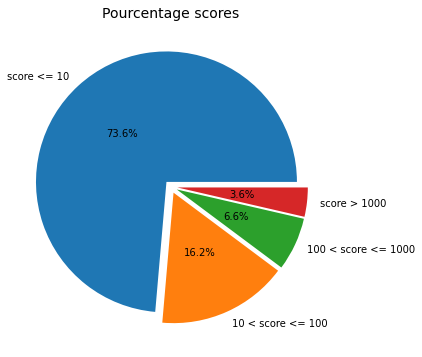

In [83]:
pie, ax = plt.subplots(figsize=[10,6])
labels = final_dic.keys()
plt.pie(x=final_dic.values(), autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Pourcentage scores", fontsize=14);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e80043e2-6875-4b65-a196-a0ffb97a1282' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>